# Session1 - Linear Regression

In [56]:
import matplotlib
import scipy.io
import numpy as np
import random
from matplotlib import pyplot as plt
try:
    import seaborn as sns
    use_seaborn = True
    sns.set()
except:
    use_seaborn = False
    
#Notes personnelles en plus
#firstCol,second_col = X[:,0],X[:,1]
#df.keys()
#np.arange(10, 30, 5)    #=> [10, 15, 20, 25] 
#np.linspace(0, 2, 9)    # 9 numbers from 0 to 2

# x+y+z = 2
# 6x-4y+5z = 31
# 5x+2y+2z = 13
# #Ce fait avec :
# a = np.array([[1, 1, 1],
#           [6, -4, 5],
#           [5, 2, 2]])
# b = np.array([2, 31, 13])
# print(np.linalg.solve(a, b))




## 1.1 Univariate regression

* **Load** the dataset and **plot** each feature in function of the blood sugar levels. If you had to select 1 feature only, which one would you keep?

In [57]:
df = scipy.io.loadmat(f"data/diabetes.mat")
X = df["X"]
n_samples, n_feats = X.shape
t = df["t"]
t_names = ["age", "sex", "bmi", "blood_pressure", "serum_1", 
           "serum_2", "serum_3", "serum_4", "serum_5", "serum_6"]

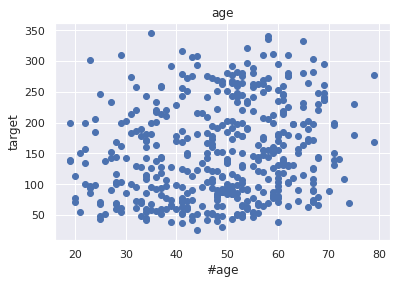

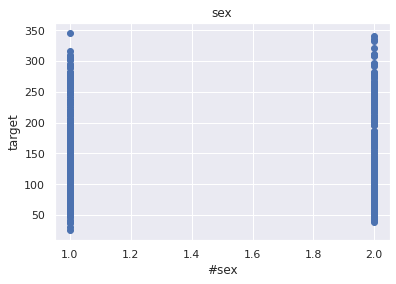

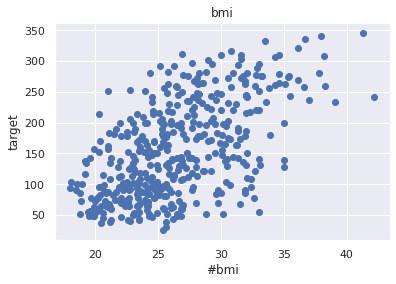

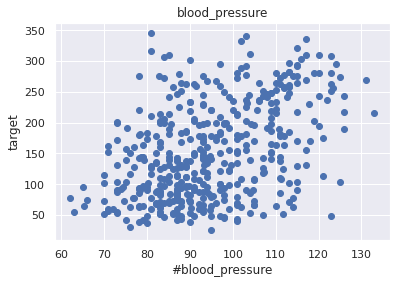

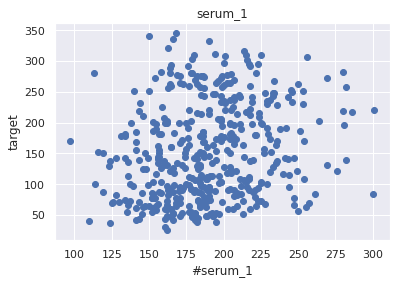

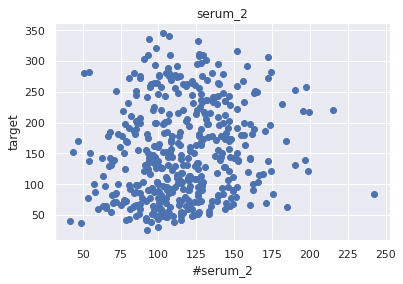

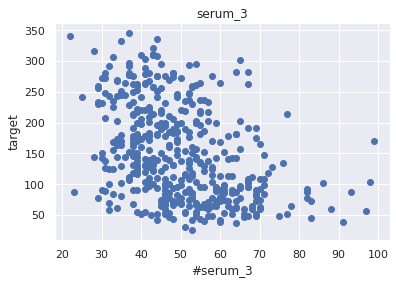

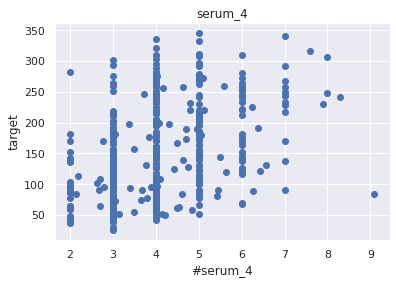

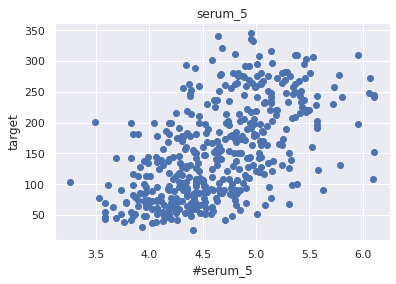

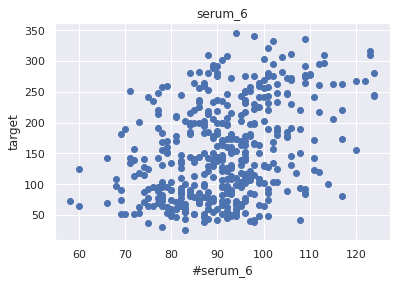

In [58]:
###################
# INSERT CODE HERE
###################
## TODO: plot the target as a function of each feature independantly
## using plt.scatter

for i in range(n_feats):
    plt.scatter(X[:,i], t)  # 0,0 pour l'emplacement dans le sous-plot
    plt.title(t_names[i])
    plt.ylabel("target")
    plt.xlabel("#"+t_names[i])
    plt.show()
    
# serum_5, bmi, blood_pressure


## 1.2 Univariate regression

* **Implement** linear regression using the pseudo-inverse method. Take a piece of paper to write down vector dimensions before blindly going into the coding part

In [71]:
from sklearn.base import BaseEstimator

class MyLinearRegressor(BaseEstimator):
    def __init__(self, add_bias=True):
        super().__init__()
        self.add_bias = add_bias
        
    def fit(self, X, y):
        if self.add_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=-1)
        if len(y.shape) < 2:
            y = np.expand_dims(y, axis=-1)
        ###################
        # INSERT CODE HERE:
        # Implement the pseudo-inverse method
        # watch out for matrix and vector dimensions!
        ###################
        
        #Compute the parameters => Train the model
        # X is of dimension (samples, features)
        # inverse of a matrix (features x features) so it's ok
        # Bias is added at the end
        
        # @ means matrix multiplication
        # X.T means the inverse of X
        self.w = np.linalg.inv(X.T@X)@(X.T@y)
        self.bias = self.w[-1] if self.add_bias else 0
        self.w = self.w[:-1] if self.add_bias else self.w
        return self
    
    def predict(self, X):
        ###################
        # INSERT CODE HERE:
        # Use the result of the fit function to return the
        # predicted target vector
        ###################
        
        #Give new data to see what the model predict for it
        y = X@self.w + self.bias
        y = np.squeeze(y, axis=-1) # To cover space and have good
        return y
    
    def fit_predict(self, X, y):
        return self.fit(X, y).predict(X)
    
    def score(self, X, y_true):
        return 0

## 1.3 RMSE & Bivariate Linear Reg.
* **Write** the RMSE function
* **Compute** the Linear Regression by selecting 2 features this time. Does the RMSE improve when using 2 vectors

In [97]:
# Compute the Root Mean Square Error
def compute_rmse(predict, target):
    ###################
    # INSERT CODE HERE
    ###################
    
    #Facon avec norme carré mais enfaite c'est norme (donc absolute value)
    P = len(target)
#     summ = 0
#     for i in range(P):
#         summ += (target[i] - predict[i]) ** 2
#     return np.sqrt((1/P) * summ)
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)


###################
# INSERT CODE HERE: 
# Create one 1-var linear regressor and one 2-vars linear regressor;
# Predict target values according to both models
###################
t_cols = t[:,0]
predict = MyLinearRegressor().fit_predict(X[:,9][:,None], t)  #:,None pour changer la dimension comme on veut : np.expenddims
predict2 = MyLinearRegressor().fit_predict(X[:,3][:,None], t)

print(compute_rmse(predict, t))
print(compute_rmse(predict2, t))

71.15040825266249
69.09496293051097


## 1.4 Multivariate Linear Reg.
* **Sort** all the features according to their linearity with the target vector
* **Test** your extended framework by cumulating all the features (first 1, then 2, followed by 3, 4 etc). What do you conclude? Is there an optimal number of features

[1, 5, 0, 4, 9, 6, 7, 3, 8, 2]


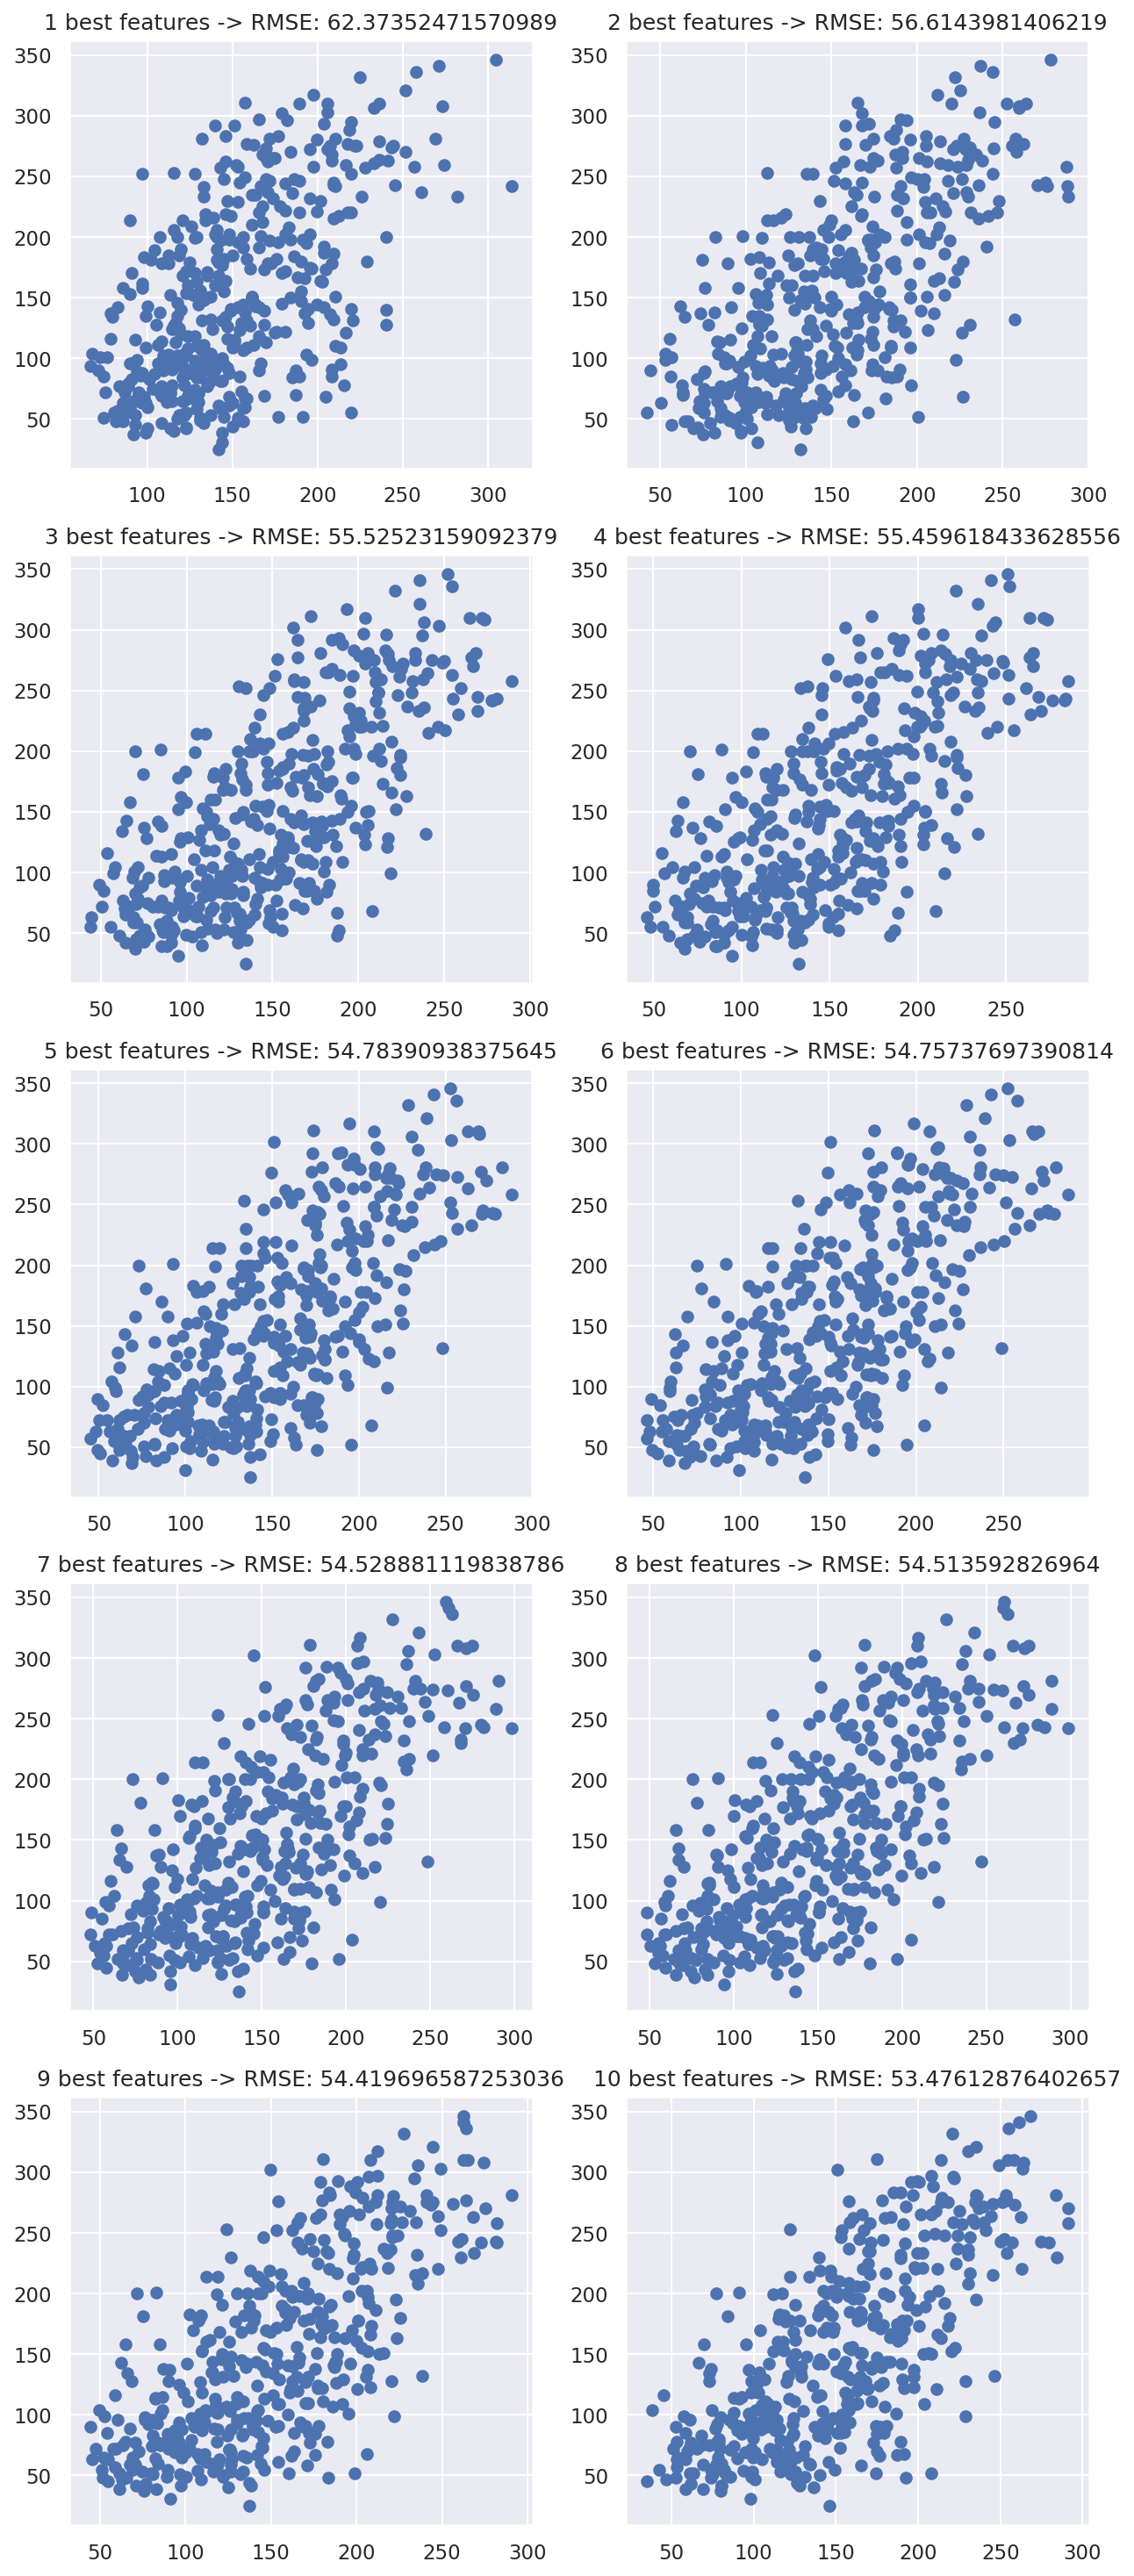

In [106]:
tab=[]
for i in range(n_feats):
    result = compute_rmse(MyLinearRegressor().fit_predict(X[:,i][:,None], t), t)
    tab.append((i, result))
tab = sorted(tab, key=lambda x:x[1])
tab.reverse()
# print(tab)
sorted_features = []
for i in range(n_feats):
    sorted_features.append(tab[i][0])
print(sorted_features)

    
plt.figure(figsize=(10, 25), dpi=150)
# plt.figure(figsize=(5, 12), dpi=75)

###################
# INSERT CODE HERE:
# fill in the sorted_features vector
###################

for i in range(1,len(t_names)+1):
    linreg = MyLinearRegressor()
    best_indices = sorted_features[-i:]
    xx = X[:, best_indices]

    predict = linreg.fit_predict(xx, t)

    plt.subplot(5,2,i)
    plt.scatter(predict, t)
    plt.title(f'{i} best features -> RMSE: {compute_rmse(predict, t)}')

plt.show()

## 1.5 Train-test Generalization
* **Repeat** ex. 1.4 but this time seperating your training set in 2 parts: train and test as given in the code below

Text(0.5, 1.0, '(X2, t2) \n 3 best corrcoeff -> RMSE: 53.81480033849046')

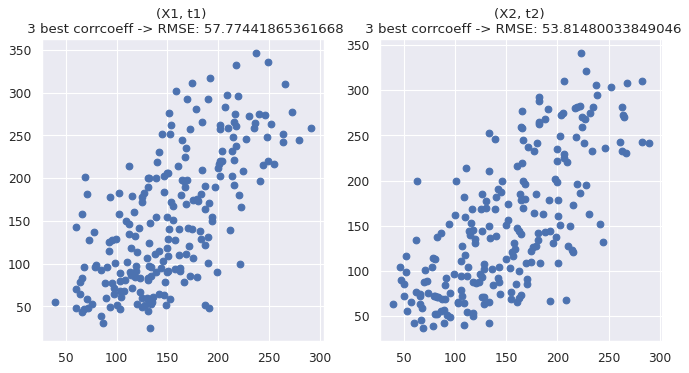

In [107]:
X_copy = X.copy()
t_copy = t.copy()

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_perm, t_perm = unison_shuffled_copies(X_copy, t_copy)
half_index = X_perm.shape[0]//2

X1 = X_perm[:half_index, :]
X2 = X_perm[half_index:, :]

t1 = t_perm[:half_index, :]
t2 = t_perm[half_index:, :]

linreg = MyLinearRegressor()
###################
# INSERT CODE HERE:
# add a for loop around i, or change it manually
###################
i = 3
best_indices = sorted_features[-i:]

xx1 = X1[:, best_indices]
xx2 = X2[:, best_indices]

linreg.fit(xx1, t1)

plt.figure(figsize=(10, 5), dpi=80)


plt.subplot(1,2,1)
predict_X1 = linreg.predict(xx1)
plt.scatter(predict_X1, t1)
plt.title(f'(X1, t1) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X1, t1)}')


plt.subplot(1,2,2)
predict_X2 = linreg.predict(xx2)
plt.scatter(predict_X2, t2)
plt.title(f'(X2, t2) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X2, t2)}')


## 1.6 Stochastic Gradient Descent
![image.png](data/image.png)
* On a piece of paper **write** the missing gradient computations
* Once you've computed the equations, **implement** them in the code below and **check** that your solution converges to the same one as the inverse method. Do you think there is more than 1 possible optimal solution? Why?

In [8]:
# tpred = z1+B donc son dérivé est = 1
# dérivé de l par rapport à z1 = dérivé de L par rapport a tpred * 1
# dérivé de L par rapport a a2 = dérivé de L par rapport a z1*1

class MySGDLinearRegressor(MyLinearRegressor):
    def __init__(self, n_epochs=100, lr=1e-3, lr_annealing=0.99, **kwargs):
        super().__init__(**kwargs)
        self.n_epochs = n_epochs
        self.lr = lr
        self.lr_annealing = lr_annealing
        
    def fit(self, X, y):
        assert X.shape[-1] == 2, "Only 2 features are supported for now"
        if len(y.shape) < 2:
            y = np.expand_dims(y, axis=-1)
        
        w0 = 1
        w1 = 100
        b  = -10
        lr = self.lr
        ## Compute coeffs
        for epoch in range(self.n_epochs):
            for x, ytrue in zip(X, y):
                # Compute Gradient
                ###################
                # INSERT CODE HERE
                # Compute all the red arrows present in the image
                ###################

                # Update weights
                ###################
                # INSERT CODE HERE
                # w0 = w0 - ???
                # w1 = w1 - ???
                # b  = b  - ???
                ###################

                # Update lr (lr-annealing slowly diminishes the lr)
                lr = lr*self.lr_annealing/(lr+self.lr_annealing)

        self.coeffs = np.array([w0, w1])
        self.bias = b#[0]
        return self
best_indices = sorted_features[-2:]
xx = X[:, best_indices]

linreg = MyLinearRegressor()
sgdlinreg = MySGDLinearRegressor(n_epochs=100, lr=1e-3, lr_annealing=0.9)

real_score = linreg.fit(xx, t).score(xx, t)
sgd_score = sgdlinreg.fit(xx, t).score(xx, t)

print(f"Pseudo-inverse method: {real_score:5.2f} (coeffs: {linreg.coeffs[0]}, bias={linreg.bias})")
print(f"SGD method:            {sgd_score:5.2f} (coeffs: {sgdlinreg.coeffs}, bias={sgdlinreg.bias})")

NameError: name 'sorted_features' is not defined